# Estatística & Probabilidade - 2023/02

## Projeto 03 - Uma introdução ao aprendizado de máquina

### Hugo Tremonte de Carvalho

#### hugo@dme.ufrj.br

#### Google Classroom: `oug6dox`

# -- INSTRUÇÕES -- LEIAM ATENTAMENTE! --

* A data limite de entrega da avaliação é domingo 17/11/2023 às 23h59, prazo improrrogável. Avaliações entregues após esse prazo serão desconsideradas.

* A entrega deve ser feita exclusivamente através do Google Classroom, usando a linguagem Python dentro de um notebook do Google Colaboratory, a ser anexado na atividade da seguinte forma:
  - Dentro da turma no Google Classroom, clique em "Atividades"
            
  - No tema "Projetos", clique em "Projeto 03" e em seguida em "Ver atividade"
            
  - No canto superior direito, clique em "+ Adicionar ou criar" e em seguida selecione em "Arquivo" ou "Google Drive", se optar fazer upload do notebook ou selecionar um arquivo de seu Google Drive, respectivamente.
            
  - O título do notebook deverá ser, obrigatoriamente, "SEU NOME - Projeto 03".
            
  - Para entregar o projeto, abra a atividade que o contém (conforme procedimento explicado no ponto acima), e no canto superior direito clique em "ENTREGAR" (o texto estará em uma caixa cinza, mas ele é clicável).
            
  - Na tela a seguir clique em "Entregar" para confirmar a entrega do trabalho.
            
  - Se você se arrependeu e quiser fazer outra entrega, basta abrir a atividade, no canto superior direito clique em "Cancelar envio" e confirme clicando novamente em "Cancelar envio" na janela que irá abrir. Você pode fazer isso quantas vezes quiser até o prazo determinado.
            
  - As explicações que você precisará fazer devem ser feitas em células de texto em seu notebook. Somente comentários pequenos devem ser feitos no código.
            
  - Caso seja necessário, equações podem ser introduzidas em $\LaTeX$ nas células de texto.
            
  - Figuras também podem ser incluídas em células de texto, tanto através de upload quanto simplesmente arrastando-a para alguma célula de texto. Nesse caso, sempre informe a fonte de onde a figura foi retirada, caso não tenha sido gerada por você.

* O projeto poderá ser feito **até** em dupla: quem quer fazer sozinho/a faz, mas quem quiser fazer em dupla também tem esse direito. Porém, vamos evitar problemas de "eu fiz tudo e ele/a não fez nada"! Infelizmente não tenho como controlar isso, e após o projeto entregue não adianta "eu fiz tudo sozinho/a", pois eu não estava lá para ver! Tentem se resolver entre si, mas em último caso posso auxiliar com uma mediação.

* No caso de trabalho em dupla, apenas **uma** pessoa da dupla deverá fazer o envio do trabalho, claro, deixando explícito quem é o/a parceiro/a.

* A troca de conhecimento na realização da avaliação é permitida e encorajada: ciência se faz com colaboração, e devemos seguir esse espírito aqui. Porém, cada dupla (ou indivíduo) deverá ter a sua própria resolução, e cópias ou outras ilegalidades serão severamente punidas com a anulação da avaliação para o(s) aluno(s) suspeito(s).

* Todos os passos de sua resolução devem ser devidamente justificados.

* Ao entregar essa avaliação, você afirma ter lido e estar de acordo com essas regras, comprometendo-se a cumpri-las.

O objetivo desta atividade é lhes introduzir a alguns aspectos de aprendizagem de máquina, tanto teóricos quanto práticos. Primeiramente, vamos introduzir um pouco de teoria e terminologia.

# Introdução

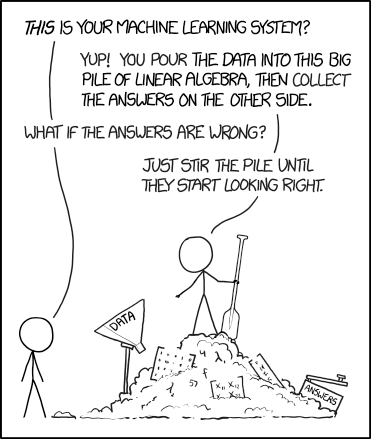

Retirado de https://xkcd.com/1838/

* **Estatística**: "Disciplina que trata da coleta, organização, análise, interpretação e apresentação de dados". [Fonte: Wikipedia]

* **Aprendizado estatístico/*Machine Learning***: Conjunto de ferramentas e modelos para entender dados, com especial atenção a aspectos de eficiência computacional. [Fonte: Wikipedia + vozes da minha cabeça]

* Métodos tradicionais de Estatística não são mais capazes de lidar com volumes de dados disponíveis atualmente

* Dados complexos: um bom entendimento sobre a aplicação não é somente importante mas crucial, em particular, para a elaboração de novas metodologias

* Em particular, metodologias e algoritmos podem ser fortemente dependentes da aplicação

Mudança de paradigma

* Estatística do Séc. XX:
   - Resultados assintóticos
   - $n \gg p$, onde $n$ é o número de observações e $p$ é o número de covariáveis

- Aplicações modernas:
   * $p \approx n$ ou $p \gg n$ -- ou seja, potencialmente mais coisas para se estimar do que se observa!
   * Resultados assintóticos não se aplicam mais

Duas culturas:
- Modelagem dos dados: criação e validação de um modelo para os dados observados. Foco em inferência
- Modelagem algorítmica: criação de bons algoritmos para prever novas instâncias observadas. Muitas vezes não lança mão de modelo probabilístico algum para os dados

$\Rightarrow$ "Nem melhor nem pior, apenas diferentes!"

Duas grandes áreas:

- Aprendizado supervisionado: modelos para aprender uma relação entre uma entrada e uma saída com base em um conjunto de exemplos ◄
- Aprendizado não-supervisionado: algoritmos que aprendem padrões e estruturas subjacentes em dados não-anotados

Dois principais tipos de problemas:

- Regressão: variável de saída é quantitativa
- Classificação: variável de saída é categórica ◄

## Classificação supervisionada sob a ótica da modelagem dos dados

- $\mathbf{X}$ vetor aleatório em $\mathbb{R}^p$ - *preditores* ou *atributos* (*features*)
- $\mathcal{C}$ conjunto finito - *rótulos*
- $Y$ variável aleatória em $\mathcal{C}$ finito

- Distribuição de probabilidade conjunta para $(\mathbf{X}, Y)$
- Observações $(\mathbf{X}_1, Y_1), \dots, (\mathbf{X}_n, Y_n), \dots \sim (\mathbf{X}, Y)$ iid
- Problema de **predição**: A partir de observações $(\mathbf{x}_i, y_i)_{i = 1, \dots, n}$ encontrar $g: \mathbb{R}^p \to \mathcal{C}$ (dito o *classificador*) tal que $$``g(\mathbf{x}_{n + 1}) \approx y_{n + 1}, \dots, g(\mathbf{x}_{n + m}) \approx y_{n + m}"$$

- Como formular tal pergunta sem aspas?
- Como encontrar tal $g$?

- *Risco esperado* associado à $g$: $$R(g) = \mathbb{E}[\underbrace{(Y - g(\mathbf{X}))^2}_{L(g; (\mathbf{X}, Y))}]$$
- "Basta" encontrar $g$ que minimiza tal quantidade! :-)

Mas nem tudo são flores...
- Tal procedimento é impossível... requer conhecimento completo do modelo probabilístico que relaciona $\mathbf{X}$ com $Y$!
- Além disso, a *perda quadrática* $L(g; (\mathbf{X}, Y)) = (Y - g(\mathbf{X}))^2$ não faz sentido no problema de classificação!

$$``g(\mathbf{x}_{i}) \approx y_{i}"$$

$$g(\mathbf{x}_{i}) = y_{i} \implies \text{:-)} \\ g(\mathbf{x}_{i}) \neq y_{i} \implies \text{:-(}$$

Uma função perda razoável parece ser $$L(g; (\mathbf{X}, Y)) = \mathbb{I}(Y \neq g(\mathbf{X})),$$ que vale $0$ se $Y = g(\mathbf{X})$ ou $1$ se $Y \neq g(\mathbf{X})$. Sua respectiva função risco é dada por $$R(g) = \mathbb{E}[\mathbb{I}(Y \neq g(\mathbf{X}))] = \mathbb{P}(Y \neq g(\mathbf{X})).$$

Qual classificador $g$ minimiza tal probabilidade?

### O classificador de Bayes

*Teorema*: A função $g: \mathbb{R}^p \to \mathcal{C}$ que minimiza o risco $$R(g) = \mathbb{E}[\mathbb{I}(Y \neq g(\mathbf{X}))] = \mathbb{P}(Y \neq g(\mathbf{X}))$$ é o *classificador de Bayes*, dado por $$g(\mathbf{x}) = \mathop{\mathrm{argmax}}_{d \in \mathcal{C}} \mathbb{P}(Y = d | \mathbf{X} = \mathbf{x})$$


- Classificamos $\mathbf{x}$ com a classe que possui a maior probabilidade *a posteriori*
- Porém, $\mathbb{P}(Y = d | \mathbf{X} = \mathbf{x})$ é em geral desconhecida

- Estimar $\mathbb{P}(Y = d | \mathbf{X} = \mathbf{x})$ para cada classe $d \in \mathcal{C}$
- Considerar o classificador $$\widetilde{g}(\mathbf{x}) = \mathop{\mathrm{argmax}}_{d \in \mathcal{C}} \widehat{\mathbb{P}}(Y = d | \mathbf{X} = \mathbf{x})$$

### Classificador de Bayes ingênuo

#### Formulação matemática - atributos contínuos

- $\mathbf{X} \in \mathbb{R}^p$ vetor de atributos - vetor aleatório contínuo
- Sendo $\mathbf{X}$ contínuo com densidade $q(\mathbf{x})$, temos que: $$\mathbb{P}(Y = d | \mathbf{X} = \mathbf{x}) = \frac{q(\mathbf{x} | Y = d)\mathbb{P}(Y = d)}{\sum_{c \in \mathcal{C}} q(\mathbf{x} | Y = c)\mathbb{P}(Y = c)} ~~~~ \mathrm{[\textit{Bayes...}]}$$
- $\mathbb{P}(Y = d)$ estimado através da proporção amostral entre as classes
- Assumir algum modelo probabilístico em $\mathbf{X}$ para estimar $q(\mathbf{x} | Y = d)$
- $\mathrm{[\textit{...ingênuo}]}$ Para toda classe $d \in \mathcal{C}$, fatoramos $$q(\mathbf{x} | Y = d) = q(x_1, \dots, x_p | Y = d) = \prod_{j = 1}^{p} q(x_j | Y = d)$$
- *Condicionalmente à classe* $Y$, as componentes de $\mathbf{X}$ são independentes

#### Formulação matemática - atributos discretos

- $\mathbf{X} \in \mathbb{R}^p$ vetor de atributos - vetor aleatório discreto
- Sendo $\mathbf{X}$ discreto, temos que: $$\mathbb{P}(Y = d | \mathbf{X} = \mathbf{x}) = \frac{\mathbb{P}(\mathbf{X} = \mathbf{x} | Y = d)\mathbb{P}(Y = d)}{\sum_{c \in \mathcal{C}} \mathbb{P}(\mathbf{X} = \mathbf{x} | Y = c)\mathbb{P}(Y = c)} ~~~~ \mathrm{[\textit{Bayes...}]}$$
- $\mathbb{P}(Y = d)$ estimado através da proporção amostral entre as classes
- Assumir algum modelo probabilístico em $\mathbf{X}$ para estimar $\mathbb{P}(\mathbf{X} = \mathbf{x} | Y = d)$
- $\mathrm{[\textit{...ingênuo}]}$ Para toda classe $d \in \mathcal{C}$, fatoramos $$\mathbb{P}(\mathbf{X} = \mathbf{x} | Y = d) = \mathbb{P}(X_1 = x_1, \dots, X_p = x_p | Y = d)$$ $$= \prod_{j = 1}^{p} \mathbb{P}(X_j = x_j | Y = d)$$
- *Condicionalmente à classe* $Y$, as componentes de $\mathbf{X}$ são independentes

### Classificador de Bayes ingênuo gaussiano

- $p$ atributos
- $n$ observações de cada


- Dados observados: $X$ matriz $n \times p$
- Cada linha: uma realização do vetor aleatório **contínuo** $\mathbf{X} \in \mathbb{R}^{p}$

- Variável resposta $Y \in \mathcal{C}$ - $n$ observações

- Como $\mathbf{X}$ é contínuo, temos que:


$$\mathbb{P}(Y = d | \mathbf{X} = \mathbf{x}) = \frac{q(\mathbf{X} = \mathbf{x} | Y = d)\mathbb{P}(Y = d)}{\sum_{c \in \mathcal{C}} q(\mathbf{X} = \mathbf{x} | Y = c)\mathbb{P}(Y = c)} \propto q(\mathbf{X} = \mathbf{x} | Y = d)\mathbb{P}(Y = d)$$

- $\mathbb{P}(Y = d)$ estimado através da proporção amostral entre as classes

- Assumir algum modelo probabilístico em $\mathbf{X}$ para estimar $q(\mathbf{X} = \mathbf{x} | Y = d)$, para $d \in \mathcal{C}$

- Hipótese ingênua: *condicionado à classe, as componentes de $\mathbf{X}$ são independentes*

- Matematicamente: *para toda classe $d \in \mathcal{C}$, fatoramos* $$q(\mathbf{X} = \mathbf{x} | Y = d) = q(X_1 = x_1, \dots, X_p = x_p | Y = d) = \prod_{j = 1}^{p} q(X_j = x_j | Y = d)$$


- $X_j | Y = d \sim \text{N}(\mu_{dj}, \sigma_{dj}^2)$

### Classificador de Bayes ingênuo Bernoulli

- $p$ atributos
- $n$ observações de cada


- Dados observados: $X$ matriz $n \times p$
- Cada linha: uma realização do vetor aleatório **discreto** $\mathbf{X} \in \mathbb{R}^{p}$

- Variável resposta $Y \in \mathcal{C}$ - $n$ observações

- Como $\mathbf{X}$ é discreto, temos que:


$$\mathbb{P}(Y = d | \mathbf{X} = \mathbf{x}) = \frac{\mathbb{P}(\mathbf{X} = \mathbf{x} | Y = d)\mathbb{P}(Y = d)}{\sum_{c \in \mathcal{C}} q(\mathbf{X} = \mathbf{x} | Y = c)\mathbb{P}(Y = c)} \propto \mathbb{P}(\mathbf{X} = \mathbf{x} | Y = d)\mathbb{P}(Y = d)$$

- $\mathbb{P}(Y = d)$ estimado através da proporção amostral entre as classes

- Assumir algum modelo probabilístico em $\mathbf{X}$ para estimar $\mathbb{P}(\mathbf{X} = \mathbf{x} | Y = d)$, para $d \in \mathcal{C}$

- Hipótese ingênua: *condicionado à classe, as componentes de $\mathbf{X}$ são independentes*

- Matematicamente: *para toda classe $d \in \mathcal{C}$, fatoramos* $$\mathbb{P}(\mathbf{X} = \mathbf{x} | Y = d) = \mathbb{P}(X_1 = x_1, \dots, X_p = x_p | Y = d) = \prod_{j = 1}^{p} \mathbb{P}(X_j = x_j | Y = d)$$


- $X_j | Y = d \sim \text{Bern}(p_{dj})$

# O projeto

O objetivo do projeto é trabalhar com a base de dados MNIST ("*Modified National Institute of Standards and Technology*"). Tal base consiste de 70.000 imagens de tamanho 28 x 28, em tons de cinza, contendo dígitos manuscritos, e o principal objetivo com ela é identificar qual é o dígito em questão. Algoritmos extremamente sofisticados (e pesadíssimos!) chegam a atingir uma taxa de erro de 0,17%, mas aqui vamos trabalhar com um algoritmo bem mais simples, o classificador de Bayes ingênuo Gaussiano, introduzido acima. Para tal, vamos usar o pacote `scikit-learn` (https://scikit-learn.org/stable/), que implementa diversos algoritmos de aprendizado de máquina de forma muito eficiente e de fácil uso. Abaixo seguem alguns códigos para melhor guiá-los, e no meio há instruções para o que deve ser feito no projeto.

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## A base de dados

Primeiramente, vamos carregar e fazer uma análise preliminar na base de dados. Vamos baixar a base e ver o DataFrame que a contém:

In [4]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [5]:
print(X.shape)
display(X)

(70000, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Vejamos agora o vetor `y`, bem como o seu tamanho:

In [6]:
print(y.shape)
display(y)

(70000,)


0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

Como podemos ver acima, `X` é um *dataframe* de 70.000 linhas e 784 colunas, e `y` é um *array* de tamanho 70.000, contendo o número referente a cada linha de `X`. Portanto, cada linha de `X` representa uma imagem de um dígito manuscrito. Vejamos alguns exemplos:

In [7]:
# FONTE: https://www.kaggle.com/code/soham1024/basic-neural-network-from-scratch-in-python

def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(12, 12))
    index = 1
    for x in zip(images, title_texts):
        image = x[0].reshape(28, 28)
        title_text = x[1]
        plt.subplot(rows, cols, index)
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);
        index += 1

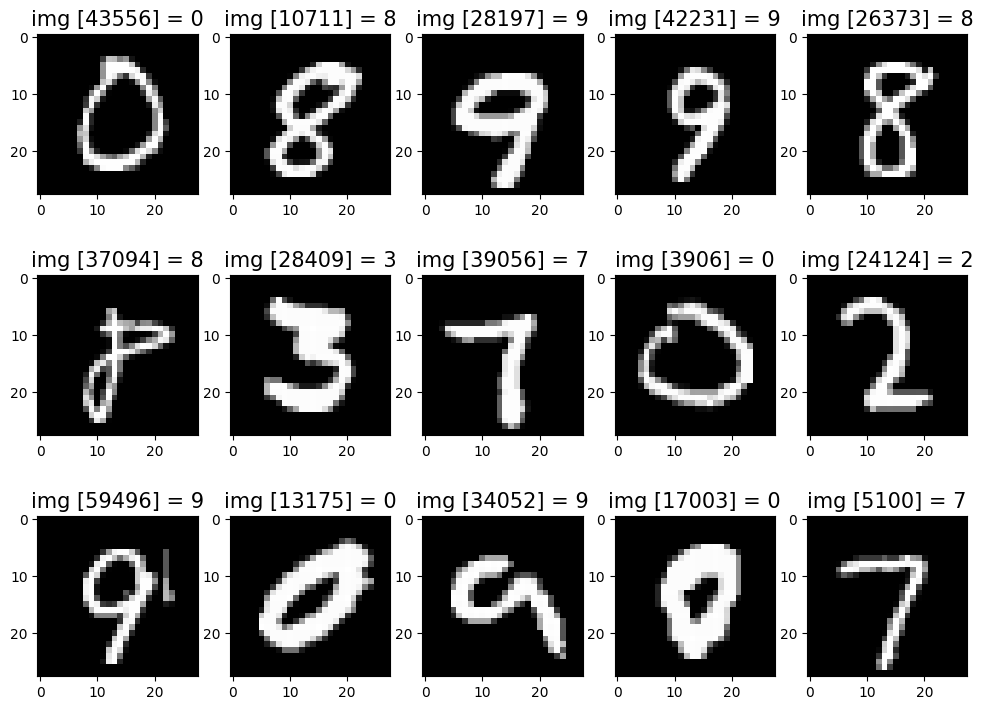

In [8]:
random_images = []
for i in range(0, 15):
    r = np.random.randint(1, 70000)
    random_images.append((X.values[r], 'img [' + str(r) + '] = ' + str(y[r])))

show_images(list(map(lambda x: x[0], random_images)), list(map(lambda x: x[1], random_images)))

Acima, nós vimos como são algumas das linhas de `X` pensadas como uma imagem de tamanho 28 x 28. Agora, vamos estudar a sua estrutura como um vetor de tamanho 784.

Dígito: 2


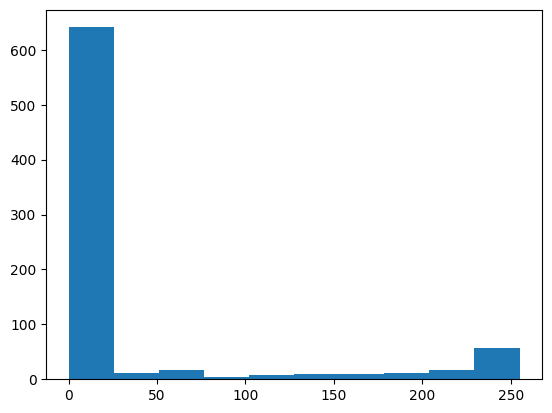

In [9]:
r = np.random.randint(1, 70000)
plt.hist(X.values[r])
print('Dígito:', y[r])
plt.show()

Portanto, do ponto de vista estatístico, cada linha do *dataframe* `X` consiste de 784 observações de variáveis aleatórias que tomam seus valores entre 0 e 255 e concentram-se principalmente em torno de tais valores. Essa é exatamente a estrutura de uma imagem em tons de cinza: o valor igual a 0 representa um *pixel* totalmente preto e um valor igual a 255 representa um *pixel* totalmente branco. Recomendo rodar diversas vezes o bloco acima, para verificar como varia o histograma dos tons de cinza. Nosso objetivo será tentar identificar qual dígito está sendo representado por determinado vetor de tamanho 784 (cujas componentes chamaremos de *atributos*), utilizando os classificadores de Bayes ingênuo gaussiano e Bernoulli que discutimos acima.

Para melhorar a magnitude de nossos dados, iremos fazer uma espécie de normalização, dividindo todos os valores de `X` por 255, para que tenhamos sempre valores entre 0 e 1.

ATENÇÃO! Se você rodar a célula abaixo mais de uma vez, vai estar "comprimindo" ainda mais os valores de X! Recomendo não fazer isso!

In [10]:
X = X/255

**QUESTÃO 1:** Os classificadores de Bayes ingênuo gaussiano e Bernoulli têm duas hipóteses: condicionado na classe, os atributos são (1) independentes e (2) descritos por distribuições normais (com parâmetros desconhecidos) ou Bernoulli (com parâmetro desconhecido). "Traduza" o que isso significa na linguagem do problema em questão (quais são nossos atributos? nossas classes? etc...), e discorra sobre a razoabilidade de tais hipóteses em nosso cenário.

*BÔNUS*: Apresente uma análise exploratória para justificar as suas conclusões.

Abaixo segue um breve *spoiler* da análise exploratória.

Montando e exibindo a matriz de correlação dos *pixels*, condicionado em um dígito específico:

In [11]:
dig = 5
corr_dig = (X[y == str(dig)] + np.random.normal(loc = 0, scale = 0.001, size = X[y == str(dig)].shape)).corr() # Com maracutaia!
corr_dig[0, 0] = -1 # Com maracutaia!

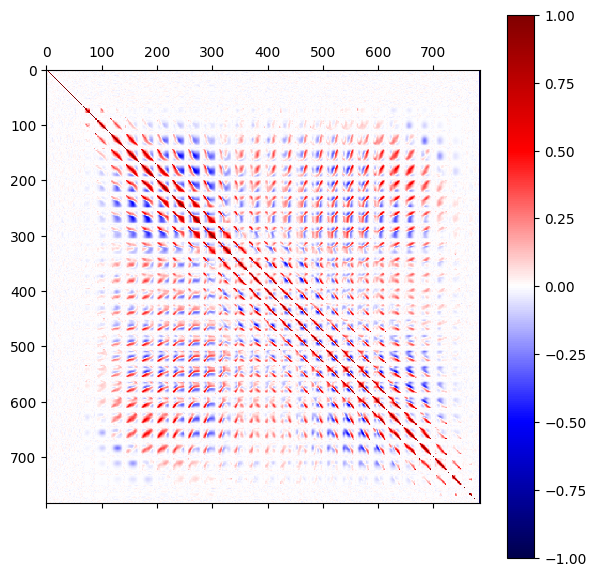

In [12]:
plt.figure(figsize = (7, 7))
plt.matshow(corr_dig, cmap = 'seismic', fignum = 1)
plt.colorbar()
plt.show()

Histograma de determinado *pixel*, condicionado em um dígito específico:

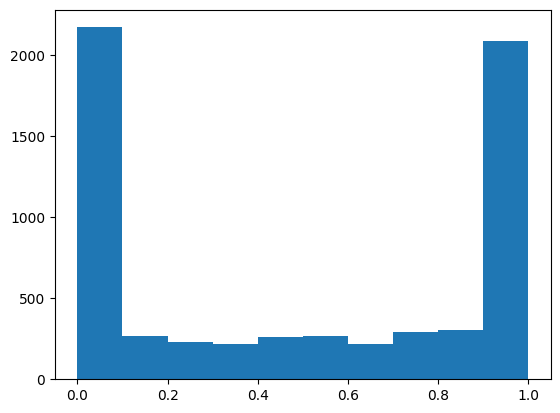

In [13]:
dig = 5
pixel = 350
plt.hist(X[y == str(dig)]['pixel' + str(pixel)])
plt.show()

[Bernoulli]

## Classificando a base

Uma prática em aprendizagem de máquina é dividir nossa base de dados em duas partes: um *conjunto de treinamento* e um *conjunto de teste*. O primeiro será usado para estimarmos os parâmetros que o classificador precisará, e o segundo será usado para medir a sua performance. O `scikit-learn` tem ferramentas que fazem essa separação de modo automático. Abaixo, deixamos 60.000 observações para treinamento e 10.000 para teste. Para garantir igual representatividade das classes em ambos os conjuntos fazemos uma *amostragem estratificada*, através do parâmetro `stratify = y`.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 10000, shuffle = True, stratify = y)

**QUESTÃO 2:** As classes que vamos usar para fazer o nosso procedimento são as `GaussianNB` e `BernoulliNB`, localizadas dentro do módulo `naive_bayes`. A documentação do `scikit-learn` é bastante informativa, e particularmente me ajuda bastante a entender os algoritmos lá implementados. Portanto, leiam a documentação referente ao `GaussianNB` (https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) e ao `BernoulliNB` (https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html), e as página direcionadas através do *link* "User Guide", onde encontram-se as formulações matemática por trás dos método em questão. Após essa leitura, façam uma comparação do que lá é dito com o que foi apresentado acima sobre o método de classificação proposto, elencando pontos onde há semelhanças e divergências. Em particular, descreva o que os métodos `fit`, `predict` e `predict_proba` fazem.

Resposta:


Comparando o conteúdo scikit-learn com o que foi apresentado aqui no projeto, podemos ressaltar algumas semelhanças e divergências.

Em resumo, o conteúdo scikit-learn aborda os classificadores Naive Bayes GaussianNB e BernoulliNB na biblioteca scikit-learn. Esses classificadores são usados para tarefas de classificação, com o GaussianNB sendo apropriado para dados contínuos e o BernoulliNB sendo projetado para dados binários ou booleanos. O texto detalha os parâmetros, métodos e fórmulas associadas a esses modelos.

Enquanto o conteúdo explicitado no projeto, por outro lado, discute o classificador de Bayes em um contexto mais teórico, apresentando o teorema do classificador de Bayes. Ele explica o conceito de minimização de risco, a formulação matemática para atributos contínuos e discretos, e introduz a hipótese ingênua condicional, que assume independência entre as componentes dos vetores de atributos condicionados à classe.

Ambos os textos abordam o tema de classificação, especificamente utilizando o Classificador de Bayes. Eles utilizam a notação matemática para expressar os conceitos e fórmulas e também discutem a dificuldade prática de calcular a probabilidade a posteriori exata $\mathbb{P}(Y = d | \mathbf{X} = \mathbf{x})$, levando à necessidade de estimá-la.
Ambos propõem uma abordagem ingênua, onde a independência condicional das variáveis é assumida para simplificar o cálculo das probabilidades. Ambos os textos discutem a probabilidade condicional em relação à classe.

Sobre as diferenças o scikit, até por ser uma biblioteca, especifica mais a abordagem modelos para dados contínuos (GaussianNB) e binários (BernoulliNB), explicando seu uso e aplicação do funcionamento do lib. O Texto do projeto já aborda a formulação matemática para atributos contínuos e discretos, mas não se limita a um contexto específico de implementação. Ainda nesse sentindo, a documentação das funções fornece informações práticas sobre como usar os classificadores Naive Bayes em scikit-learn. E o conteúdo aqui do projeto é mais teórico, discutindo conceitos como risco, formulações matemáticas e hipótese ingênua condicional.

Agora, falando sobre os métodos fit, predict e predict_proba:

fit (Método de Treinamento): O método fit é usado para treinar o classificador Naive Bayes de acordo com os dados de treinamento fornecidos.
Parâmetros:
X: Vetores de treinamento, onde n_samples é o número de amostras e n_features é o número de características.
y: Rótulos/targets associados às amostras de treinamento.
sample_weight: Pesos aplicados às amostras individuais (1.0 para não ponderado).
Retorno: Retorna a instância do próprio classificador treinado.

predict (Método de Classificação):O método predict é usado para realizar a classificação em um conjunto de amostras de teste.
Parâmetros:
X: Vetores de teste, onde n_samples é o número de amostras e n_features é o número de características.
Retorno: Retorna um array de rótulos preditos para as amostras de teste.

predict_proba (Método de Estimativa de Probabilidades): O método predict_proba é usado para retornar as estimativas de probabilidade para as amostras de teste. O próprio site sklearn ressalta que embora o classificador de Bayes ingênuo seja conhecido como um classificador decente, ele é conhecido também por ser um mau estimador, portanto, os resultados de probabilidade de predict_proba não devem ser levados muito a sério.
Parâmetros:
X: Vetores de teste, onde n_samples é o número de amostras e n_features é o número de características.
Retorno: Retorna uma matriz de forma (n_samples, n_classes) contendo as estimativas de probabilidade das amostras de teste para cada classe. Cada linha representa uma amostra e cada coluna representa uma classe.

Esses métodos são comuns aos classificadores Naive Bayes em scikit-learn e são usados para treinar o modelo (fit), realizar previsões de classe (predict) e fornecer estimativas de probabilidade associadas a cada classe (predict_proba).



**QUESTÃO 3:** Agora é a sua vez de trabalhar sobre a base de dados que apresentamos! Use o `GaussianNB` e o `BernoulliNB` para treinar os modelos de Bayes ingênuo gaussiano e Bernoulli nos conjuntos `X_train` e `y_train`, e prever os resultados no conjunto `X_test`. Agora, com um exemplo concreto em mãos, revisite o que os métodos  `predict` e `predict_proba` fazem. Uma dica é olhar os exemplos na documentação do `scikit-learn`.

Resposta:

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score

# Divide o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, shuffle=True, stratify=y, random_state=42)

# Inicializa os classificadores
gnb = GaussianNB()
bnb = BernoulliNB()

# Treina os modelos
gnb.fit(X_train, y_train)
bnb.fit(X_train, y_train)

# Faz previsões nos conjuntos de teste
y_pred_gnb = gnb.predict(X_test)
y_pred_bnb = bnb.predict(X_test)



In [16]:
"""
Agora, revisitando o que os métodos
predict e predict_proba fazem.
"""

# Faz previsões de probabilidade nos conjuntos de teste
y_prob_gnb = gnb.predict_proba(X_test)
y_prob_bnb = bnb.predict_proba(X_test)

# Exibir as primeiras 5 (o número inteiro preferido do professor) previsões de probabilidade para o modelo Gaussian Naive Bayes
print("Probabilidades previstas pelo Gaussian Naive Bayes:")
print(y_prob_gnb[:5])

# Exibir as primeiras 5 previsões de probabilidade para o modelo Bernoulli Naive Bayes
print("\nProbabilidades previstas pelo Bernoulli Naive Bayes:")
print(y_prob_bnb[:5])

# Exibir as primeiras 5 previsões do modelo Gaussian Naive Bayes
print("Previsões do Gaussian Naive Bayes:")
print(y_pred_gnb[:5])

# Exibir as primeiras 5 previsões do modelo Bernoulli Naive Bayes
print("\nPrevisões do Bernoulli Naive Bayes:")
print(y_pred_bnb[:5])


Probabilidades previstas pelo Gaussian Naive Bayes:
[[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 1.60363775e-105
  0.00000000e+000 1.00000000e+000]
 [7.17759644e-160 0.00000000e+000 2.87261893e-227 7.02600872e-157
  8.57476310e-072 3.67884596e-125 3.54665591e-017 0.00000000e+000
  1.00000000e+000 0.00000000e+000]
 [1.73965707e-157 0.00000000e+000 5.12406628e-178 1.00000000e+000
  1.49725052e-285 5.87329545e-148 1.25375782e-153 0.00000000e+000
  1.75569784e-159 0.00000000e+000]
 [0.00000000e+000 1.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  7.54563864e-257 8.88755428e-214]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 7.32352094e-190
  2.75869848e-203 1.52581132e-193 0.00000000e+000 1.21534910e-191
  2.75744712e-025 1.00000000e+000]]

Probabilidades previstas pelo Bernoulli Naive Bayes:
[[1.95391982e-110 2.90903530e-044 2.52602327e-065 1.204802

Podemos ver, de forma exemplificada, que o predict_proba é usado para obter as **probabilidades** previstas para cada classe.

Enquanto o predict nos trás valores de **classificação** das amostras. No exemplo, são valores entre 0 e 9, sendo os dígitos formados pelos pixels da base de dados fornecida.

Mais do que isso, vemos que as prediçoes fornecidas sao bem semalhantes. Quero dizer, analisando os prints acima temos no primeiro caso por gaussian que a maior probabilidade está na última casa do vetor, ou seja dígito 9. Por predict vemos que a classe prevista é, de fato, a 9 e assim por diante em cada campo, ressaltando-se a relação, já esperada, entre a probabilidade e seu uso para a classificação.  

**QUESTÃO 4:** Nós temos um conjunto de dados relativamente grande, com 60.000 observações. Para ajustar um classificador de Bayes ingênuo gaussiano, quantos parâmetros nós precisamos estimar? E para o classificador de Bayes ingênuo Bernoulli? Compare esse número com o tamanho do conjunto de treinamento, e diga o que você pode esperar da qualidade de tais estimativas pontuais.

Resposta:

[Acho que tá errado]

Para um classificador de Bayes ingênuo gaussiano, precisamos estimar os parâmetros de média e variância para cada atributo em cada classe. Portanto, para um conjunto de dados com
p atributos e C classes, o número total de parâmetros a serem estimados é 2×p×c, considerando um parâmetro para a média e outro para a variância em cada classe e para cada atributo.

Já para um classificador de Bayes ingênuo Bernoulli, o número de parâmetros é relacionado à presença ou ausência de cada atributo para cada classe. Se tivermos p atributos e C classes, o número total de parâmetros é
p×C, representando a probabilidade de ocorrência de cada atributo em cada classe.


**QUESTÃO 5:** Bom, agora nós temos um classificador e temos como prever o resultado da classificação no nosso conjunto de teste. Mas como podemos *medir* o desempenho de nosso classificador? Estude sobre a *matriz de confusão* e sobre a *acurácia* de um classificador, e disserte sobre essas duas quantidades. Relacione a quantidade retornada pelo método `score` com a acurácia que você acabou de estudar.

Recomendação:
* https://en.wikipedia.org/wiki/Confusion_matrix [A matriz de confusão aqui será referente a um problema de classificação *binário*, enquanto que estamos tratando de um problema de classificação *multiclasse*. Tome cuidado com essa diferença]
* https://en.wikipedia.org/wiki/Accuracy_and_precision

*BÔNUS:* Porque acima nós falamos somente sobre aferir a qualidade do classificador no conjunto de teste e não no de treinamento? Discuta sobre esse ponto.

Resposta:

A matriz de confusão também é conhecida como Matriz de Erros, ela é basicamente uma tabela que permite a visualização do desempenho de um algoritmo de classificação. Cada linha da matriz representa as instâncias de uma classe real, enquanto cada coluna representa as instâncias de uma classe prevista, ou vice-versa. Os valores da matriz de confusão indicam o número de vezes que um exemplo da classe real foi classificado corretamente ou incorretamente em cada classe prevista.

Temos nela os seguintes tipos de resultado:

TP (True Positive): Número de observações da classe real i que foram corretamente classificadas como i.

FN (False Negative): Número de observações da classe real i que foram erroneamente classificadas como não i.

FP (False Positive): Número de observações que não são da classe i, mas foram erroneamente classificadas como i.

TN (True Negative): Número de observações que não são da classe i e foram corretamente classificadas como não i.

Um ponto importante é que todas as previsões corretas estão localizadas na diagonal da matriz, por isso é fácil inspecionar visualmente a tabela em busca de erros de previsão, pois valores fora da diagonal os representarão.


Acurácia é uma medida de desempenho de um modelo de aprendizado de máquina. Ela é definida como a porcentagem de exemplos que são classificados corretamente.

No contexto da aprendizagem de máquina, a acurácia é calculada como:

acurácia = (número de exemplos classificados corretamente) / (número total de exemplos)
Por exemplo, se um modelo é usado para classificar 100 exemplos, e 90 desses exemplos são classificados corretamente, então a acurácia do modelo é de 90%.

A acurácia pode ser calculada para diferentes tipos de modelos de aprendizado de máquina, incluindo:

Classificadores: Modelos que são usados para classificar exemplos em duas ou mais classes.

Regressão: Modelos que são usados para prever valores contínuos.

A acurácia pode ser calculada para diferentes conjuntos de dados. Por exemplo, um modelo pode ter uma acurácia de 90% em um conjunto de dados de treinamento, mas uma acurácia de 80% em um conjunto de dados de teste. Isso ocorre porque o modelo pode ser ajustado aos dados de treinamento de forma que ele se torne muito específico para esses dados.


Por sua vez, o propósito do método score é avaliar o desempenho do modelo em dados de teste ou validação.
Para modelos de classificação, o método score geralmente retorna a acurácia do modelo, que já foi explicada acima.

A forma geral de usar o método score é a seguinte:

model.score(X_test, y_test)

Onde model é o estimador treinado, X_test são os recursos dos dados de teste e y_test são os rótulos reais dos dados de teste. A função retorna uma pontuação que representa o desempenho do modelo nos dados de teste.

Vamos calcular então para o nosso caso!


In [19]:
score_gnb = gnb.score(X_test, y_test)
score_bnb = bnb.score(X_test, y_test)

print("Score do Gaussian Naive Bayes:", score_gnb)
print("Score do Bernoulli Naive Bayes:", score_bnb)

# Avalia a acurácia prevista no conjunto de teste
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)

print("Acurácia do Gaussian Naive Bayes:", accuracy_gnb)
print("Acurácia do Bernoulli Naive Bayes:", accuracy_bnb)

Score do Gaussian Naive Bayes: 0.5577
Score do Bernoulli Naive Bayes: 0.8361
Acurácia do Gaussian Naive Bayes: 0.5577
Acurácia do Bernoulli Naive Bayes: 0.8361


Sobre aferir a qualidade do classificador no conjunto de teste e não no de treinamento:

O conjunto de treinamento é utilizado durante a fase de treinamento para ajustar os parâmetros do modelo, buscando minimizar o erro nos dados de treinamento. Porém, há risco de Overfitting: Se o modelo atinge uma acurácia muito alta no conjunto de treinamento, pode indicar overfitting, ou seja, o modelo pode ter se adaptado demais aos dados de treinamento específicos e pode não generalizar bem para novos dados. Já no teste avalia-se como o modelo generaliza para dados não vistos durante o treinamento. Por conseguinte, uma boa performance no conjunto de teste sugere que o modelo está generalizando bem para novos dados, o que é o principal objetivo em problemas de aprendizado de máquina.

A diferença crucial entre avaliar o desempenho nos conjuntos de treinamento e teste está relacionada à capacidade do modelo de generalizar para dados não vistos. Um modelo pode se ajustar muito bem aos dados de treinamento, mas essa habilidade não é garantia de bom desempenho em novos dados. Portanto, é essencial avaliar o modelo em um conjunto de teste separado para ter uma estimativa mais realista de como ele se sairá em cenários do mundo real.



**QUESTÃO 6:** Use o código dado abaixo para exibir as matrizes de confusão, bem como uma representação gráfica mais amigável delas. Analise os erros cometidos pelos classificadores e tente justificá-los, com base nas hipóteses dos classificadores e da natureza da base de dados. Calcule também a acurácia do classificador estimado. À luz dessas duas informações, extraia alguma conclusão sobre o classificador ser "bom" ou "ruim", em seu ponto de vista. Note que sua ponderação deve levar em consideração também o custo computacional dos classificadores! Use como um "pior classificador possível" aquele que atribui uma observação a qualquer um dos dígitos de 0 até 9, aleatoriamente.

In [18]:
# A variável y_test_pred abaixo deverá ser a previsão do seu classificador no conjunto de teste, ou seja, em X_test.

labels = y.cat.categories
cm = confusion_matrix(y_test, y_test_pred, labels=labels)
print(cm)
disp = ConfusionMatrixDisplay(cm, display_labels = labels)
disp.plot()
plt.show()

NameError: ignored

**QUESTÃO 7:** Finalmente, após ter realizado todos esses experimentos, descreva quais hipóteses poderiam ser aprimoradas em nosso classificador, para que ele seja mais condizente com a base de dados e, portanto, possivelmente apresente um resultado melhor.

Note que não há como atingir 100% de acurácia neste problema. Veja abaixo algumas instâncias especialmente complicadas, e possivelmente rotuladas erroneamente:

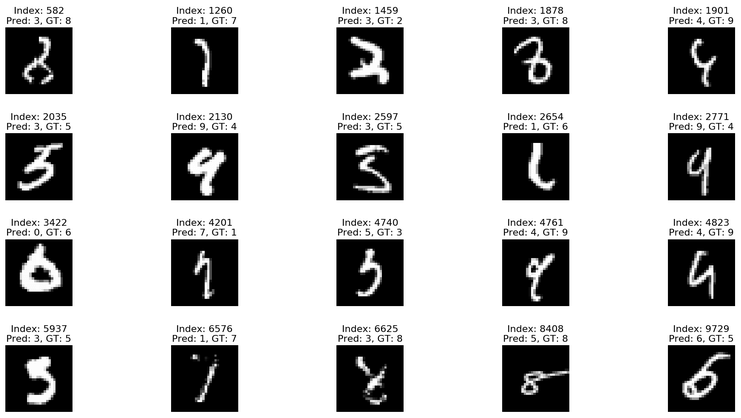